In [1]:
!pip install transformers torch
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, random_split
from transformers import BertTokenizer, BertForSequenceClassification,AdamW
from torch.nn.functional import softmax


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.4 MB/s eta 0:00:00


In [2]:
df = pd.read_csv('/dataset_with_sentiments_combined.csv')

FileNotFoundError: ignored

In [ ]:
df

,Name,Comment,Date,Model,sentiment
0,Mazda 3s,After months of releasing preview images and s...,"August 29, 2022",Maserati Grecale,3
1,Darepoole,It looks like the Macan with a little bit of I...,"March 22, 2022",Maserati Grecale,2
2,JackStraw79,Nice hot hatch!,"March 22, 2022",Maserati Grecale,4
3,CostcoPizza,"Looks like a car you'd find in GTA V DLC, whic...","March 22, 2022",Maserati Grecale,3
4,Venom21,Terrible gloss black: CheckTerrible touchscree...,"March 22, 2022",Maserati Grecale,0
...,...,...,...,...,...
50767,urquattroGus,SWoll said:So based on the poster in question ...,"March 28, 2022",Maserati Grecale,1
50768,1974foggy,Hyundai and Kia make better looking SUVs,"March 30, 2022",Maserati Grecale,3
50769,ettore,This issue here is that it’s exceptionally dul...,"March 30, 2022",Maserati Grecale,0
50770,CDP,True.The car isn't ugly by any means; it's com...,"March 31, 2022",Maserati Grecale,0


In [3]:
df_forums = pd.read_csv('/CombinedForums.csv')

In [4]:
df_pistonheads = pd.read_csv('/CombinedPistonheads.csv')

In [5]:
df = pd.concat([df_forums, df_pistonheads], ignore_index=True)

In [6]:
import numpy as np

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
model_name = "nlptown/bert-base-multilingual-uncased-sentiment" # This BERT model is trained for sentiment analysis.
model = BertForSequenceClassification.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

model.to(device)


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [9]:
def predict_sentiments(texts, batch_size):
    sentiments = []
    model.to(device)  # Ensure model is on the correct device

    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(batch, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
        with torch.no_grad():
            logits = model(**inputs).logits
        probs = softmax(logits, dim=-1)
        preds = torch.argmax(probs, dim=1)
        sentiments.extend(preds.cpu().numpy())
    return sentiments

In [10]:
df['Comment'] = df['Comment'].astype(str)
batch_size = 32
df['sentiment'] = predict_sentiments(df['Comment'].tolist(), batch_size)

In [11]:
df.to_csv('dataset_with_sentiments_combined.csv', index=False)

In [12]:
df

,Name,Comment,Date,Model,sentiment
0,Mazda 3s,After months of releasing preview images and s...,"August 29, 2022",Maserati Grecale,3
1,Darepoole,It looks like the Macan with a little bit of I...,"March 22, 2022",Maserati Grecale,2
2,JackStraw79,Nice hot hatch!,"March 22, 2022",Maserati Grecale,4
3,CostcoPizza,"Looks like a car you'd find in GTA V DLC, whic...","March 22, 2022",Maserati Grecale,3
4,Venom21,Terrible gloss black: CheckTerrible touchscree...,"March 22, 2022",Maserati Grecale,0
...,...,...,...,...,...
50767,urquattroGus,SWoll said:So based on the poster in question ...,"March 28, 2022",Maserati Grecale,1
50768,1974foggy,Hyundai and Kia make better looking SUVs,"March 30, 2022",Maserati Grecale,3
50769,ettore,This issue here is that it’s exceptionally dul...,"March 30, 2022",Maserati Grecale,0
50770,CDP,True.The car isn't ugly by any means; it's com...,"March 31, 2022",Maserati Grecale,0


In [13]:
df_with_sentiments = df.copy()

In [14]:
df_with_sentiments.to_csv('dataset_with_sentiments_combined.csv', index=False)

In [15]:
# List of car models to filter by
car_models = ['Maserati Grecale', 'Alfa Romeo Stelvio', 'BMW X3', 'Audi Q5', 'Porsche Macan']

# Filter dataset by the car models
filtered_df = df_with_sentiments[df_with_sentiments['Model'].isin(car_models)]

# Group by 'Car Model' and 'sentiment' and count
grouped = filtered_df.groupby(['Model', 'sentiment']).size().reset_index(name='Count')

print(grouped)


                 Model  sentiment  Count
0   Alfa Romeo Stelvio          0   1641
1   Alfa Romeo Stelvio          1   1617
2   Alfa Romeo Stelvio          2   2637
3   Alfa Romeo Stelvio          3   1481
4   Alfa Romeo Stelvio          4   1367
5              Audi Q5          0   2205
6              Audi Q5          1   1792
7              Audi Q5          2   2770
8              Audi Q5          3   1654
9              Audi Q5          4   1632
10              BMW X3          0   2470
11              BMW X3          1   2302
12              BMW X3          2   3139
13              BMW X3          3   2206
14              BMW X3          4   2150
15    Maserati Grecale          0    277
16    Maserati Grecale          1    287
17    Maserati Grecale          2    331
18    Maserati Grecale          3    188
19    Maserati Grecale          4    171
20       Porsche Macan          0   3435
21       Porsche Macan          1   3430
22       Porsche Macan          2   5247
23       Porsche

In [16]:
from torch.utils.data import Dataset

In [27]:
# Constants
batch_size = 16
max_sequence_length = 256
epochs = 5
learning_rate = 2e-5

In [28]:
# Tokenizer
tokenizer = BertTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [29]:
# Dataset definition with adjustments
class SentimentDataset(Dataset):
    def __init__(self, tokenizer, comments, labels, max_len):
        self.tokenizer = tokenizer
        self.comments = comments
        self.labels = labels
        self.max_len = max_len

    def __len__(self):
        return len(self.comments)

    def __getitem__(self, item):
        comment = str(self.comments[item])
        label = self.labels[item]
        encoding = self.tokenizer.encode_plus(
            comment,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )

        return {
            'comment_text': comment,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

In [30]:
# First, split the original df_with_sentiments into train and test
from sklearn.model_selection import train_test_split

In [31]:
train_df, test_df = train_test_split(df_with_sentiments, test_size=0.3, random_state=42)

In [32]:
train_data = SentimentDataset(tokenizer, train_df['Comment'].tolist(), train_df['sentiment'].tolist(), max_sequence_length)
test_data = SentimentDataset(tokenizer, test_df['Comment'].tolist(), test_df['sentiment'].tolist(), max_sequence_length)

In [33]:
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [34]:
optimizer = AdamW(model.parameters(), lr=2e-5)

In [35]:
# Define the training function
def train_epoch(model, data_loader, optimizer, device, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0

    for batch in data_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)

In [36]:
# Define the evaluation function
def eval_model(model, data_loader, device, n_examples):
    model = model.eval()
    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            _, preds = torch.max(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)

In [37]:
# Train the model
n_epochs = 5
for epoch in range(n_epochs):
    print(f'Epoch {epoch + 1}/{n_epochs}')
    print('-' * 10)
    train_acc, train_loss = train_epoch(model, train_loader, optimizer, device, len(train_df))
    print(f'Train loss {train_loss} accuracy {train_acc}')
    test_acc, test_loss = eval_model(model, test_loader, device, len(test_df))
    print(f'Test loss {test_loss} accuracy {test_acc}')
    print()

Epoch 1/5
----------
Train loss 0.6653241193128212 accuracy 0.7290095666854248
Test loss 0.5559505428023198 accuracy 0.7716649159663865

Epoch 2/5
----------
Train loss 0.4553017357379386 accuracy 0.8188519977490152
Test loss 0.5567024853393561 accuracy 0.7749474789915966

Epoch 3/5
----------
Train loss 0.31990452811061587 accuracy 0.8764772087788407
Test loss 0.6829771877211683 accuracy 0.748686974789916

Epoch 4/5
----------
Train loss 0.2386198831369227 accuracy 0.9106077658975802
Test loss 0.6682009547792312 accuracy 0.7784269957983193

Epoch 5/5
----------
Train loss 0.1893651289815078 accuracy 0.9302476083286437
Test loss 0.7071791843241159 accuracy 0.7730435924369747



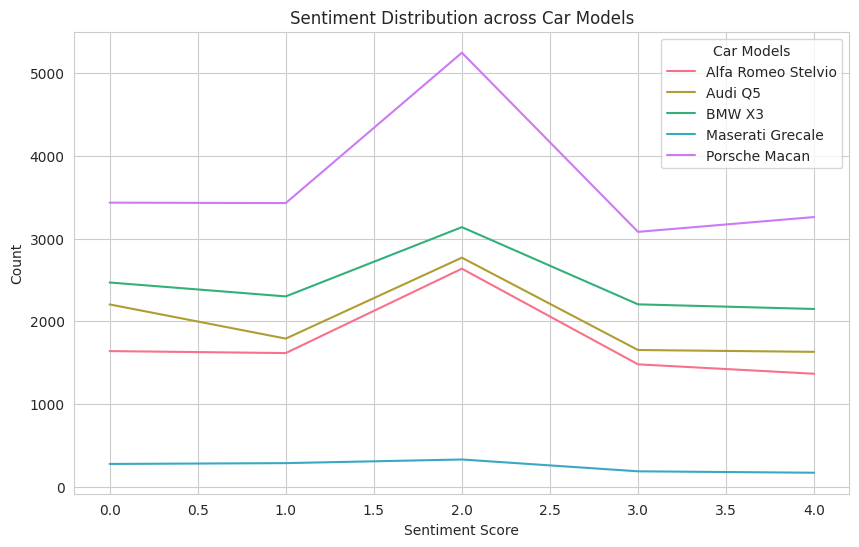

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Create a color palette
palette = sns.color_palette("husl", len(car_models))

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='sentiment', y='Count', hue='Model', palette=palette)

# Set the title and labels
plt.title('Sentiment Distribution across Car Models')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.legend(title='Car Models')

plt.show()


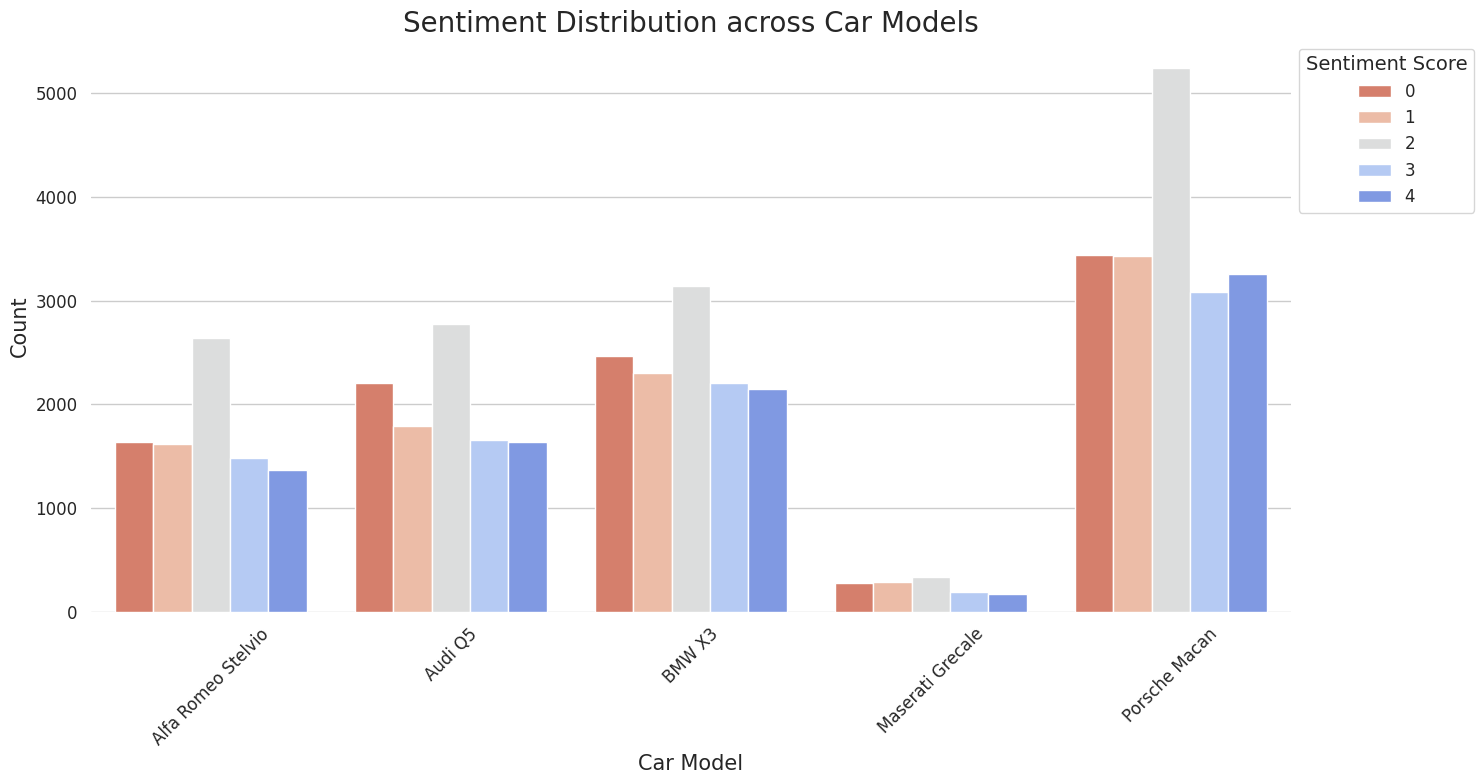

In [39]:
# Set theme and style
sns.set_theme(style="whitegrid")

# Set up a larger figure
plt.figure(figsize=(15, 8))

# Create a palette to visually differentiate sentiments
palette = sns.color_palette("coolwarm_r", 5)

# Grouped bar chart
chart = sns.barplot(data=grouped, x='Model', y='Count', hue='sentiment', palette=palette)

# Set the title and labels
plt.title('Sentiment Distribution across Car Models', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Car Model', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Sentiment Score', title_fontsize='14', fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))

# Remove the borders for a cleaner look
sns.despine(left=True, bottom=True)

# Display the plot
plt.tight_layout()
plt.show()


<ipython-input-40-24fe04630ff5>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped['Percentage'] = grouped.groupby('Model')['Count'].apply(lambda x: x / x.sum() * 100)


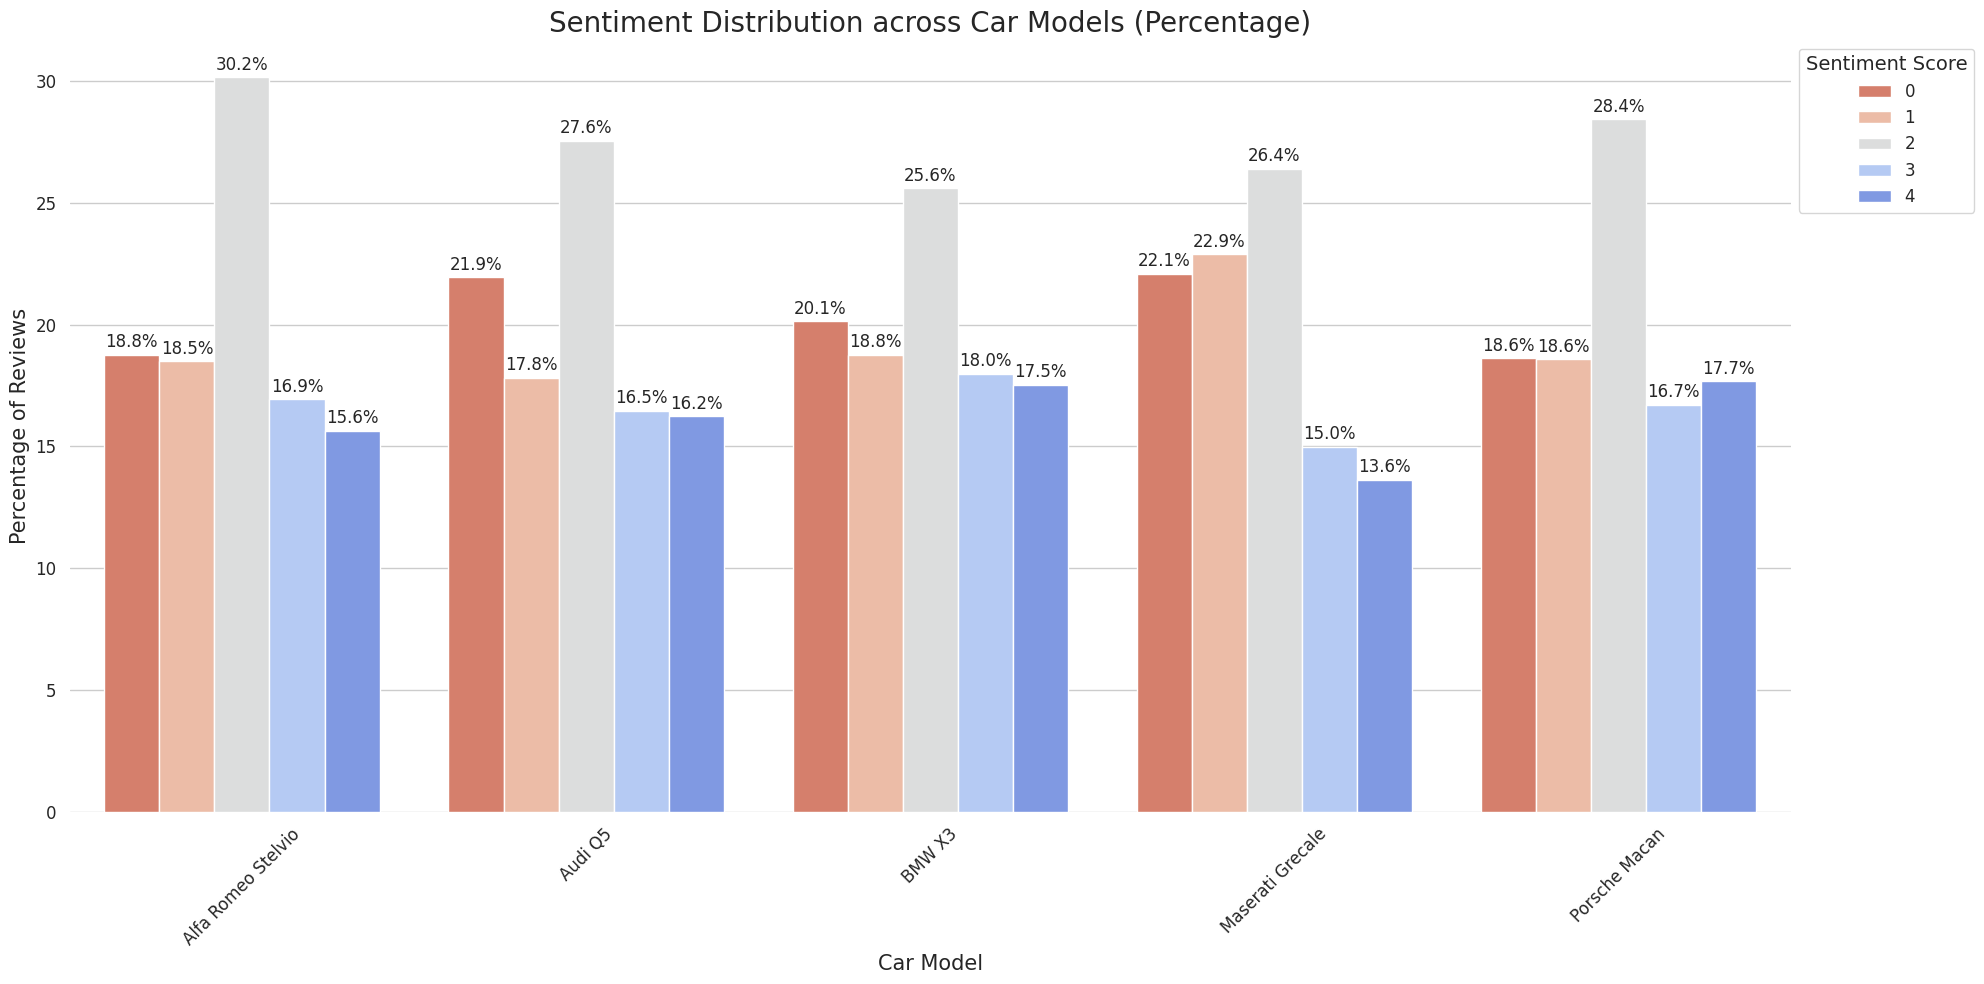

In [40]:
# Compute percentage for each sentiment score within each car model
grouped['Percentage'] = grouped.groupby('Model')['Count'].apply(lambda x: x / x.sum() * 100)

import seaborn as sns
import matplotlib.pyplot as plt

# Set theme and style
sns.set_theme(style="whitegrid")

# Set up a larger figure
plt.figure(figsize=(20, 10))

# Create a palette to visually differentiate sentiments
palette = sns.color_palette("coolwarm_r", 5)

# Grouped bar chart
chart = sns.barplot(data=grouped, x='Model', y='Percentage', hue='sentiment', palette=palette)

# Annotating each bar with the respective percentage
for p in chart.patches:
    chart.annotate(f'{p.get_height():.1f}%',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

# Set the title and labels
plt.title('Sentiment Distribution across Car Models (Percentage)', fontsize=20)
plt.ylabel('Percentage of Reviews', fontsize=15)
plt.xlabel('Car Model', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Sentiment Score', title_fontsize='14', fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))

# Remove the borders for a cleaner look
sns.despine(left=True, bottom=True)

# Display the plot
plt.tight_layout()
plt.show()


<ipython-input-41-4927bc701056>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped['Percentage'] = grouped.groupby('Model')['Count'].apply(lambda x: x / x.sum() * 100)


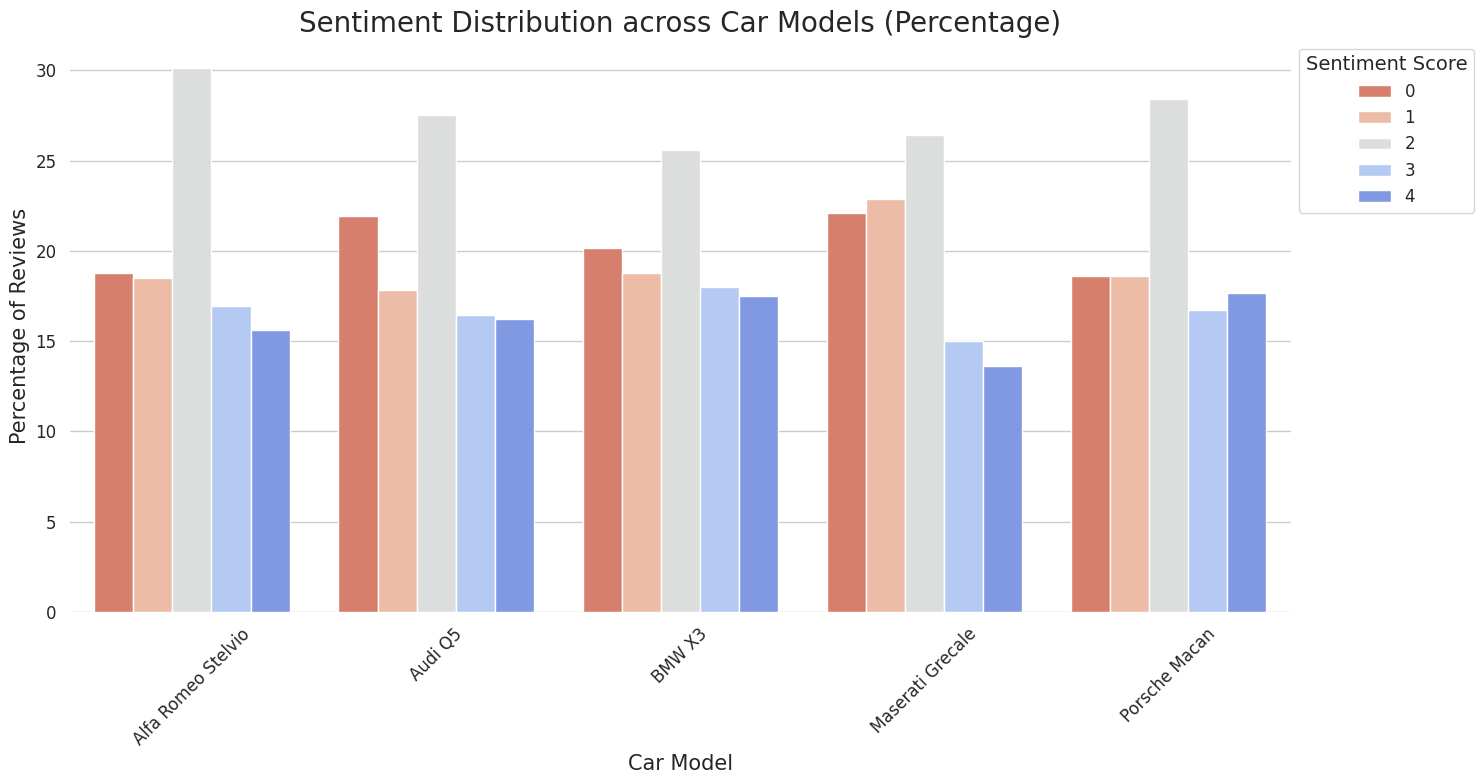

In [41]:
# Compute percentage for each sentiment score within each car model
grouped['Percentage'] = grouped.groupby('Model')['Count'].apply(lambda x: x / x.sum() * 100)

import seaborn as sns
import matplotlib.pyplot as plt

# Set theme and style
sns.set_theme(style="whitegrid")

# Set up a larger figure
plt.figure(figsize=(15, 8))

# Create a palette to visually differentiate sentiments
palette = sns.color_palette("coolwarm_r", 5)

# Grouped bar chart
chart = sns.barplot(data=grouped, x='Model', y='Percentage', hue='sentiment', palette=palette)

# Set the title and labels
plt.title('Sentiment Distribution across Car Models (Percentage)', fontsize=20)
plt.ylabel('Percentage of Reviews', fontsize=15)
plt.xlabel('Car Model', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Sentiment Score', title_fontsize='14', fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))

# Remove the borders for a cleaner look
sns.despine(left=True, bottom=True)

# Display the plot
plt.tight_layout()
plt.show()

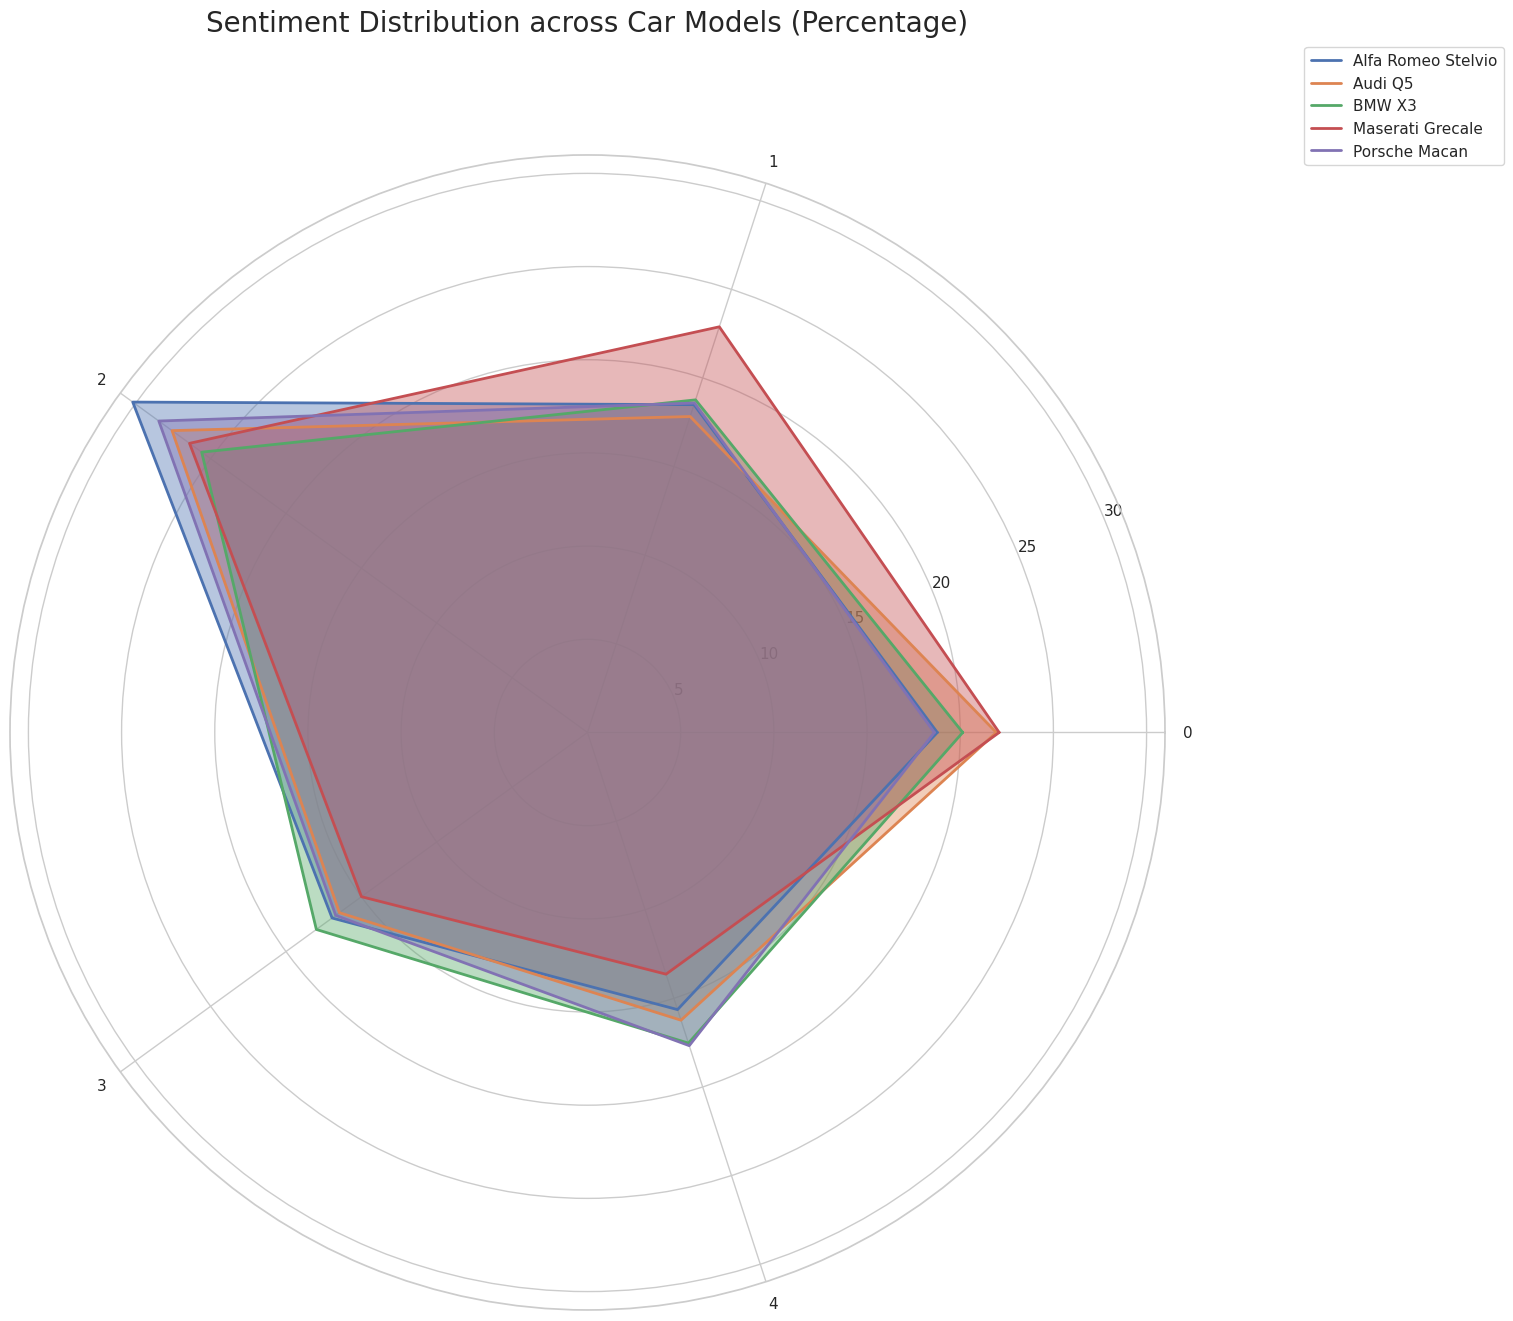

In [42]:
import numpy as np

# Number of variables (sentiments)
categories = grouped['sentiment'].unique()
N = len(categories)

# Set data
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(15, 15))
ax = plt.subplot(111, polar=True)

# Draw one axe per sentiment score with labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Plot data and fill with color for each car model
for i, model in enumerate(grouped['Model'].unique()):
    values = grouped[grouped['Model'] == model]['Percentage'].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=model)
    ax.fill(angles, values, alpha=0.4)

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Sentiment Distribution across Car Models (Percentage)', y=1.1, fontsize=20)
plt.show()


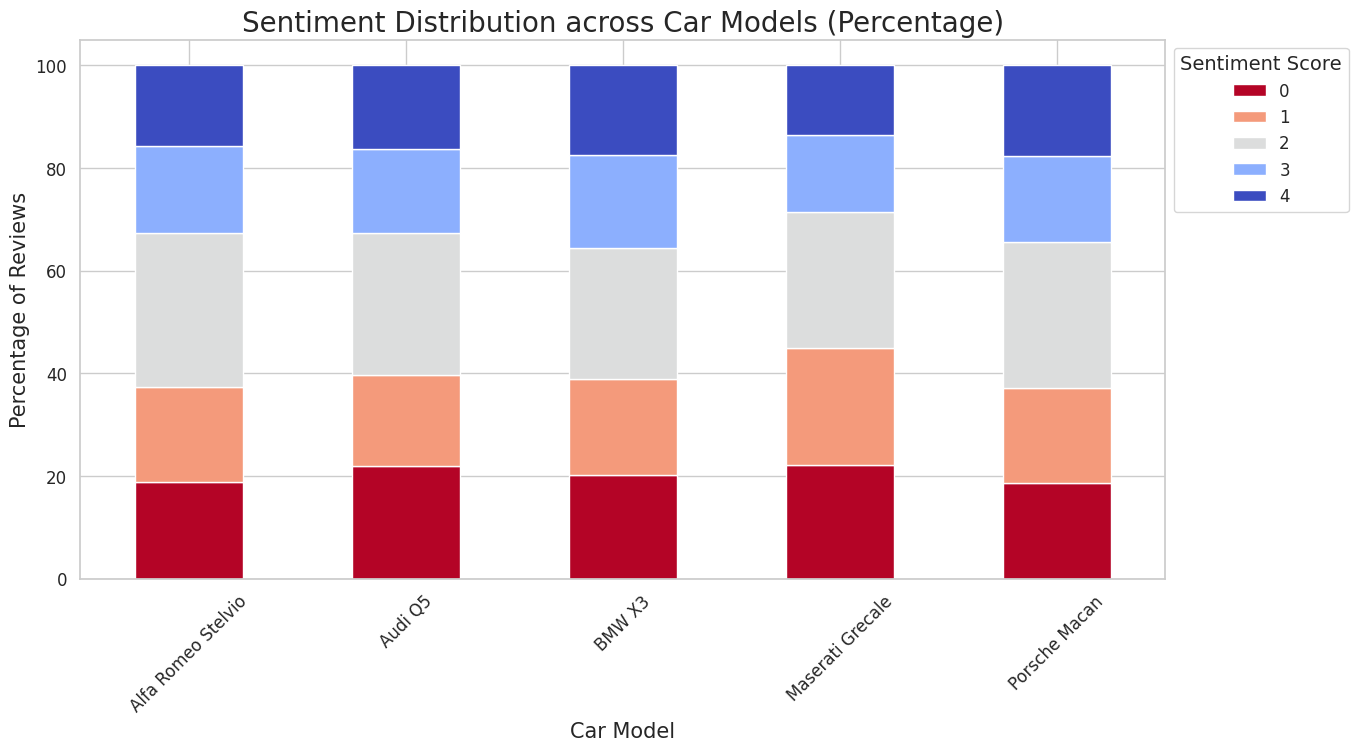

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Pivot the data for stacked bar chart
pivot_df = grouped.pivot(index='Model', columns='sentiment', values='Percentage')

# Plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(14,7), colormap="coolwarm_r")
plt.title('Sentiment Distribution across Car Models (Percentage)', fontsize=20)
plt.ylabel('Percentage of Reviews', fontsize=15)
plt.xlabel('Car Model', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Sentiment Score', title_fontsize='14', fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


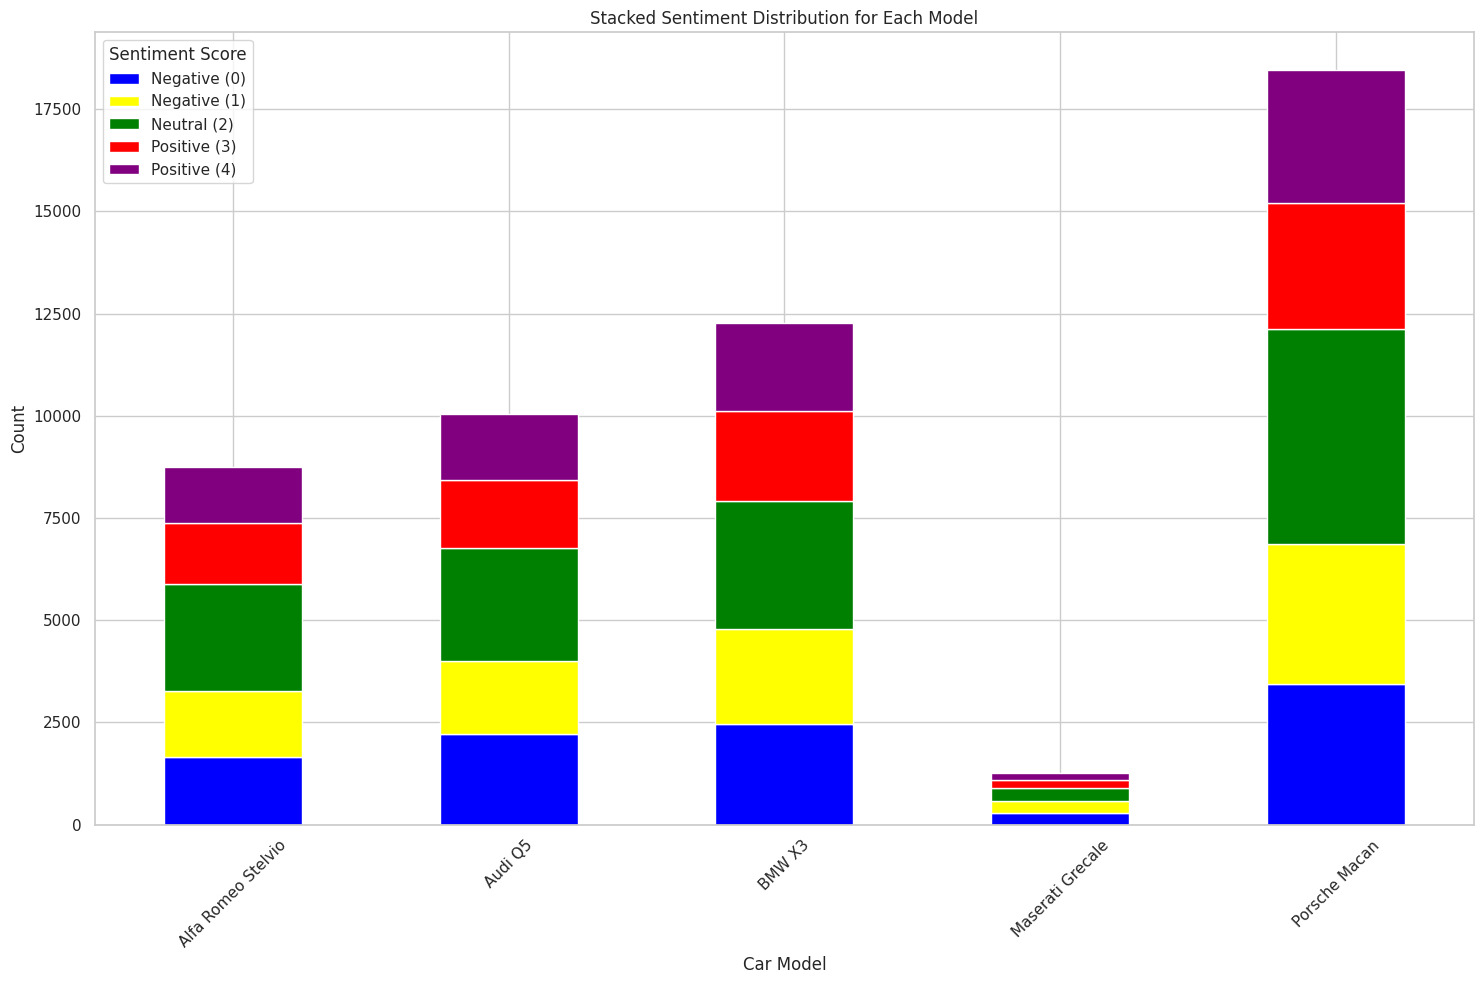

In [44]:
# Prepare data for stacked bar chart
sentiment_pivot = grouped.pivot(index='Model', columns='sentiment', values='Count')

# Define colors (this is a placeholder, adjust it according to your needs)
colors = {
    'Maserati Grecale': 'red',
    'Alfa Romeo Stelvio': 'blue',
    'BMW X3': 'green',
    'Audi Q5': 'yellow',
    'Porsche Macan': 'purple'
}

# Plotting the stacked bar chart
sentiment_pivot.plot(kind='bar', stacked=True, figsize=(15, 10), color=[colors[model] for model in sentiment_pivot.index])

plt.title("Stacked Sentiment Distribution for Each Model")
plt.xlabel("Car Model")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Sentiment Score", labels=["Negative (0)", "Negative (1)", "Neutral (2)", "Positive (3)", "Positive (4)"])
plt.tight_layout()
plt.show()


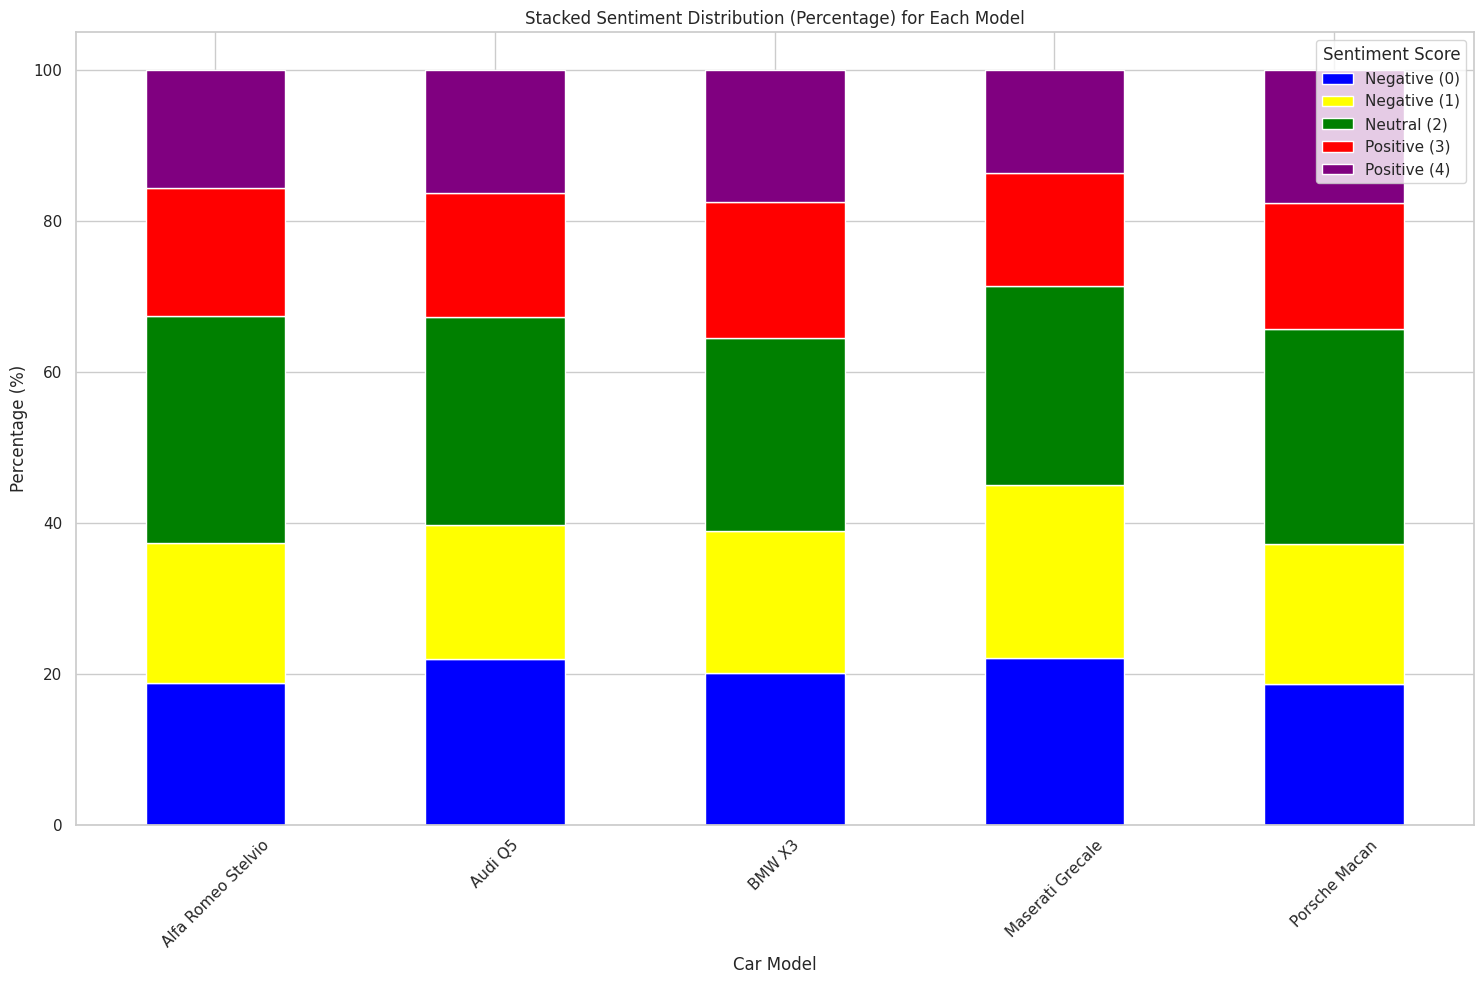

In [45]:
# Normalize the data to get percentages
sentiment_percent = sentiment_pivot.divide(sentiment_pivot.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart with percentages
sentiment_percent.plot(kind='bar', stacked=True, figsize=(15, 10), color=[colors[model] for model in sentiment_percent.index])

plt.title("Stacked Sentiment Distribution (Percentage) for Each Model")
plt.xlabel("Car Model")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend(title="Sentiment Score", labels=["Negative (0)", "Negative (1)", "Neutral (2)", "Positive (3)", "Positive (4)"])
plt.tight_layout()
plt.show()


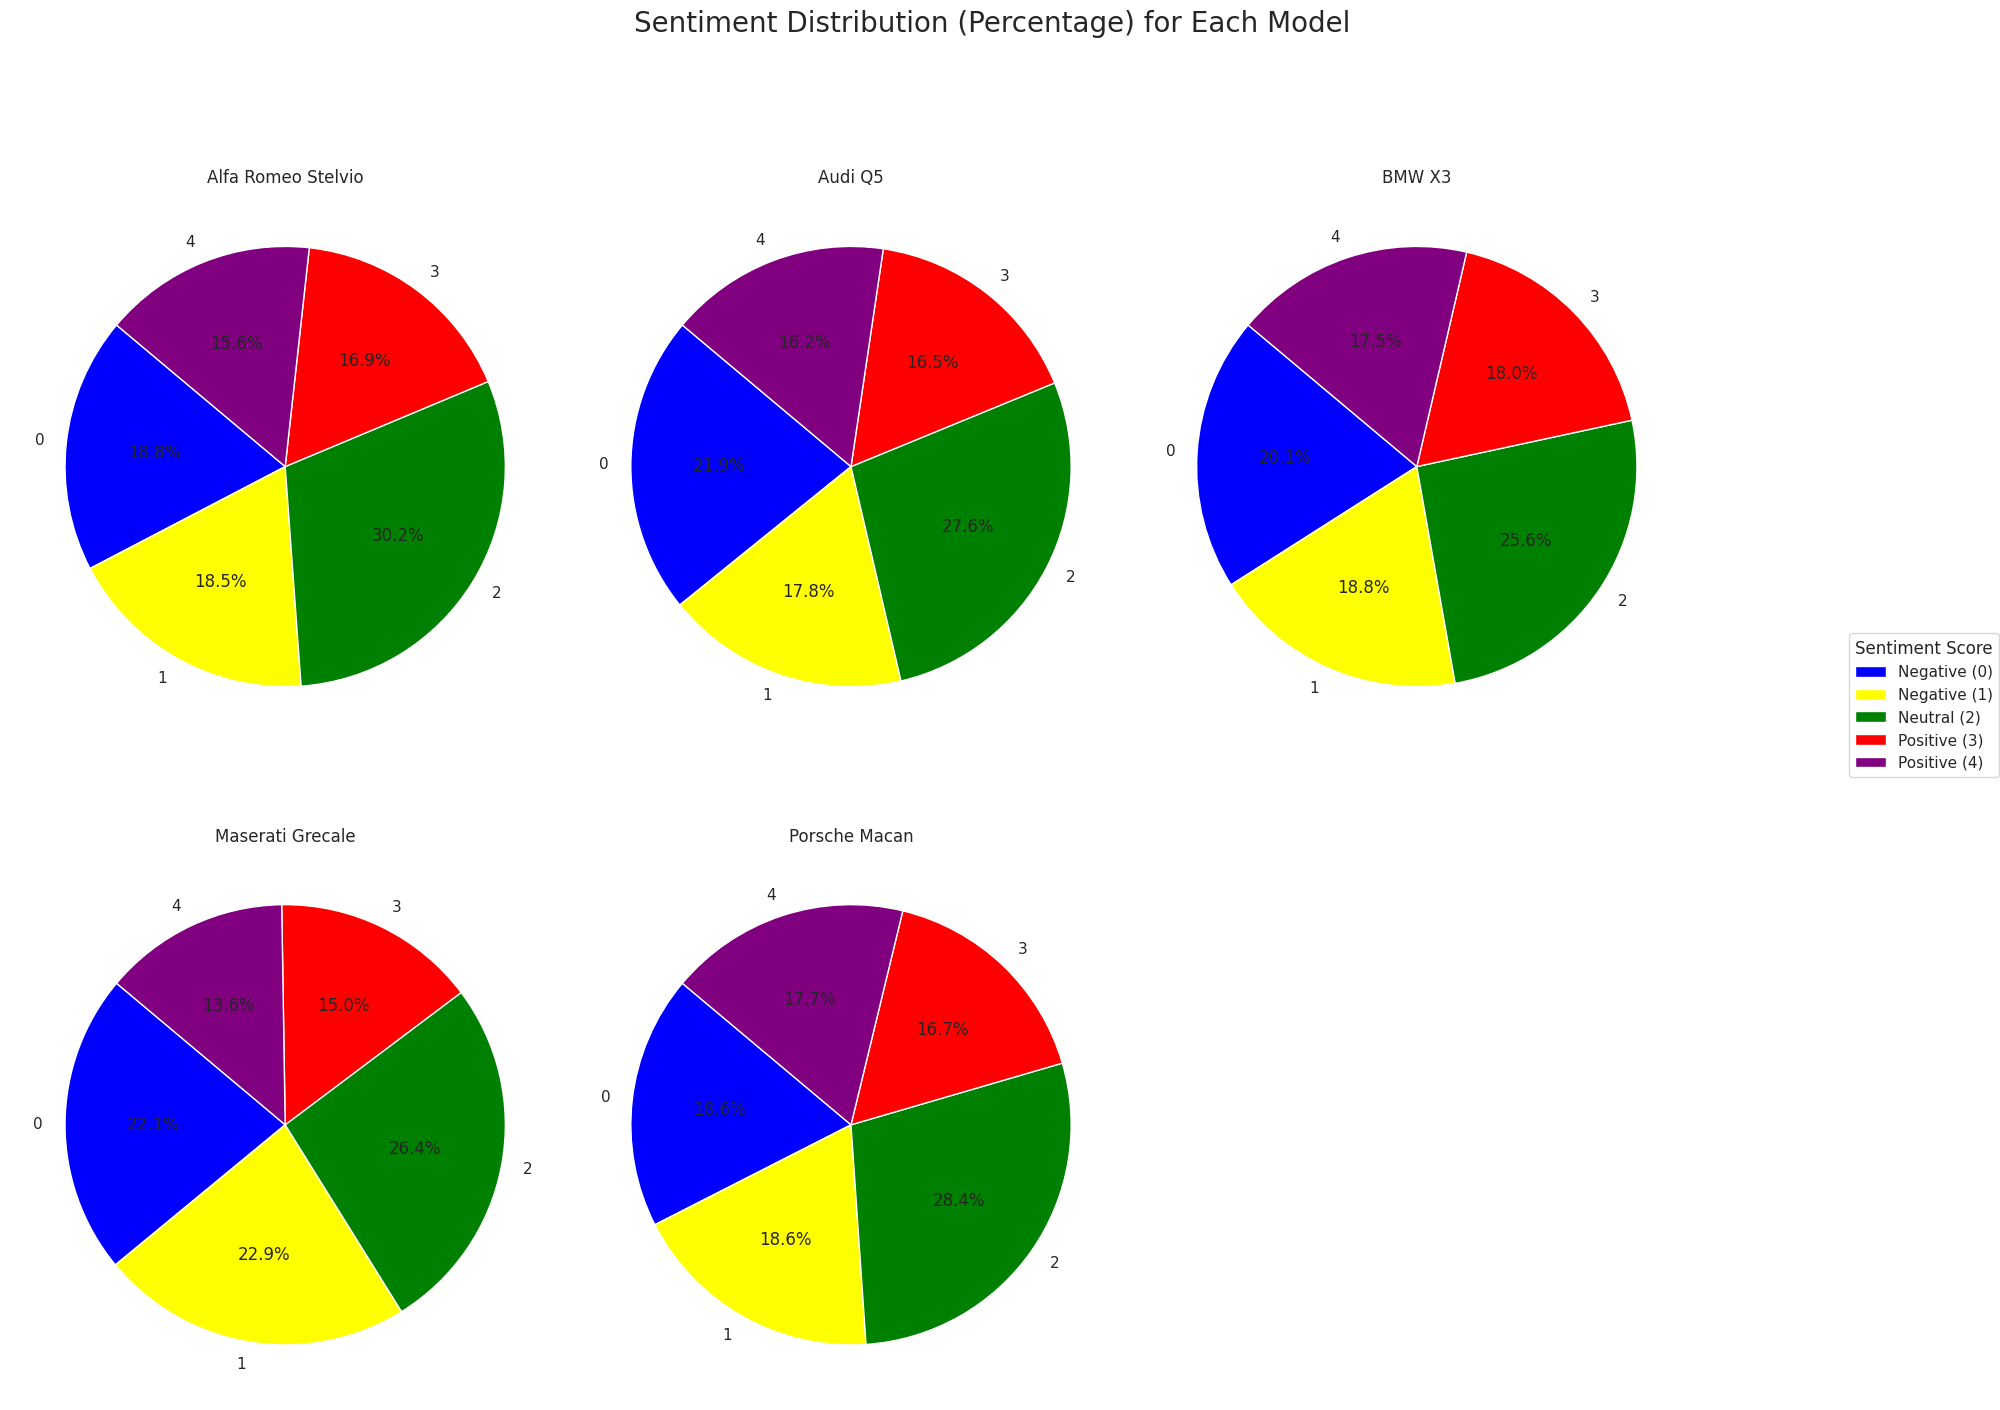

In [46]:
# Set up the figure and axes
fig, axs = plt.subplots(2, 3, figsize=(20, 15))
fig.delaxes(axs[1, 2])  # We have 5 models, so we'll remove the 6th subplot

# Labels for the sentiment scores
labels = ["Negative (0)", "Negative (1)", "Neutral (2)", "Positive (3)", "Positive (4)"]

# Generate pie charts for each model
for ax, (model, row) in zip(axs.ravel(), sentiment_percent.iterrows()):
    wedges, texts, autotexts = ax.pie(row, labels=row.index, colors=[colors[model] for model in sentiment_percent.index], autopct='%1.1f%%', startangle=140)
    ax.set_title(model)

# Add a legend to indicate which color corresponds to which sentiment group
fig.legend(wedges, labels, title="Sentiment Score", loc="center right", borderaxespad=0.1)

plt.suptitle("Sentiment Distribution (Percentage) for Each Model", fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.9, right=0.85)
plt.show()


In [ ]:
import re

def clean_text(text):
    """Clean the text data by removing non-alphanumeric characters and converting to lowercase."""
    # Convert to string (in case of NaN values or numbers)
    text = str(text)
    # Remove non-alphanumeric characters and convert to lowercase
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text).lower()
    return cleaned_text

In [ ]:

# Apply text cleaning to all datasets
df['Comment'] = df['Comment'].apply(clean_text)

# Display cleaned comments for Grecale as an example
df['Comment'].head()

0    after months of releasing preview images and s...
1    it looks like the macan with a little bit of i...
2                                       nice hot hatch
3    looks like a car youd find in gta v dlc which ...
4    terrible gloss black checkterrible touchscreen...
Name: Comment, dtype: object

In [ ]:
# Importing necessary libraries and redefining stop words
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# List of specific keywords to exclude
exclude_keywords_modified = ["car", "maserati", "grecale", "alfa", "romeo", "stelvio", "audi", "q5", "bmw", "x3", "porsche", "macan"]

# Expand the stop words list
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stop_words_extended = list(ENGLISH_STOP_WORDS) + exclude_keywords_modified

# Modify the extract_top_keywords function to use the extended stop words
def extract_top_keywords_modified(model_name, n_keywords=10):
    comments = df[df['Model'] == model_name]['Comment'].dropna()

    # Initialize TF-IDF vectorizer with extended stop words
    vectorizer = TfidfVectorizer(max_df=0.85, stop_words=stop_words_extended, max_features=5000)
    tfidf_matrix = vectorizer.fit_transform(comments)

    # Get feature names and sort them based on importance
    feature_names = vectorizer.get_feature_names_out()
    sorted_items = sorted(list(zip(feature_names, sum(tfidf_matrix.toarray()))), key=lambda x: x[1], reverse=True)


    # Get the top keywords, ensuring they are not in the exclude_keywords list
    keywords = [item[0] for item in sorted_items if item[0] not in exclude_keywords_modified][:n_keywords]
    return keywords


# Extract top keywords using the modified function
top_keywords = {}
for model_name in df['Model'].unique():
    top_keywords[model_name] = extract_top_keywords_modified(model_name)

top_keywords


{'Maserati Grecale': ['like',
  'looks',
  'just',
  'im',
  'dealer',
  'good',
  'dont',
  'suv',
  'new',
  'look'],
 'Alfa Romeo Stelvio': ['just',
  'like',
  'think',
  'giulia',
  'dont',
  'good',
  'im',
  'new',
  'got',
  'know'],
 'BMW X3': ['just',
  'like',
  'im',
  'm40i',
  'thanks',
  'new',
  'dealer',
  'dont',
  'know',
  'did'],
 'Audi Q5': ['just',
  'new',
  'like',
  'sq5',
  'good',
  'dealer',
  'thanks',
  'im',
  'think',
  'dont'],
 'Porsche Macan': ['just',
  'nan',
  'like',
  'good',
  'think',
  'new',
  'dont',
  'gts',
  'opc',
  'im']}

In [ ]:
# Analyze the sentiment of comments containing the top keywords for each model
topic_sentiment_analysis = {}

for model, keywords in top_keywords.items():
    sentiment_distribution = {}
    for keyword in keywords:
        keyword_sentiments = df_with_sentiments[(df_with_sentiments['Model'] == model) & (df_with_sentiments['Comment'].str.contains(keyword, na=False, case=False))]['sentiment']
        sentiment_distribution[keyword] = keyword_sentiments.value_counts(normalize=True).to_dict()  # Getting percentages
    topic_sentiment_analysis[model] = sentiment_distribution

# Print the sentiment analysis results
print(topic_sentiment_analysis)


{'Maserati Grecale': {'like': {1: 0.28368794326241137, 2: 0.25886524822695034, 3: 0.20921985815602837, 0: 0.1879432624113475, 4: 0.06028368794326241}, 'looks': {1: 0.3115942028985507, 2: 0.26811594202898553, 0: 0.1956521739130435, 3: 0.16666666666666666, 4: 0.057971014492753624}, 'just': {1: 0.3073394495412844, 0: 0.25688073394495414, 2: 0.23853211009174313, 3: 0.14220183486238533, 4: 0.05504587155963303}, 'im': {2: 0.28450704225352114, 1: 0.27605633802816903, 0: 0.18873239436619718, 3: 0.15492957746478872, 4: 0.09577464788732394}, 'dealer': {0: 0.3235294117647059, 1: 0.21176470588235294, 2: 0.20588235294117646, 3: 0.1588235294117647, 4: 0.1}, 'good': {2: 0.2764227642276423, 3: 0.24390243902439024, 1: 0.22764227642276422, 0: 0.13008130081300814, 4: 0.12195121951219512}, 'dont': {1: 0.5, 3: 0.21428571428571427, 0: 0.14285714285714285, 2: 0.07142857142857142, 4: 0.07142857142857142}, 'suv': {1: 0.3445378151260504, 2: 0.2184873949579832, 0: 0.2184873949579832, 3: 0.14285714285714285, 4: 0

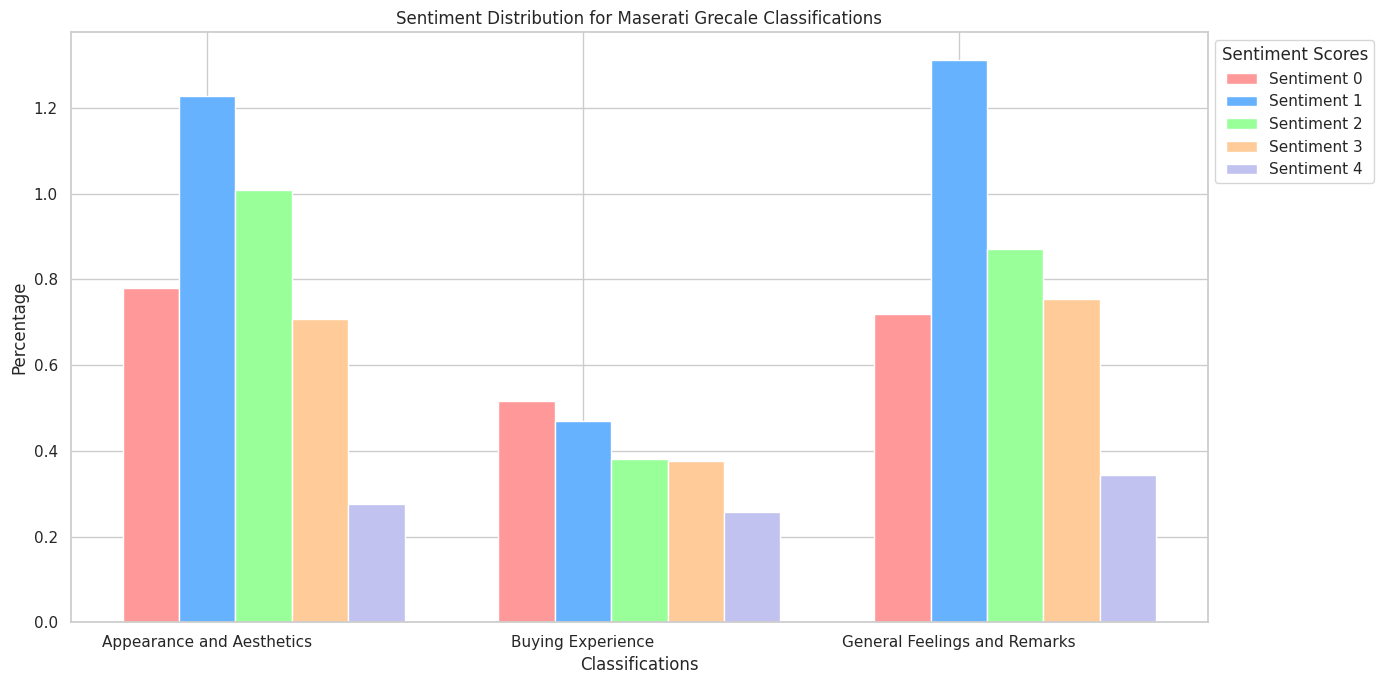

In [ ]:
import matplotlib.pyplot as plt

# Classifications and their corresponding keywords
classifications = {
    "like": "Appearance and Aesthetics",
    "looks": "Appearance and Aesthetics",
    "look": "Appearance and Aesthetics",
    "suv": "Appearance and Aesthetics",
    "dealer": "Buying Experience",
    "new": "Buying Experience",
    "good": "General Feelings and Remarks",
    "just": "General Feelings and Remarks",
    "im": "General Feelings and Remarks",
    "dont": "General Feelings and Remarks"
}

# Sentiments for each keyword
sentiments = {
    'like': {1: 0.28368794326241137, 2: 0.25886524822695034, 3: 0.20921985815602837, 0: 0.1879432624113475, 4: 0.06028368794326241},
    'looks': {1: 0.3115942028985507, 2: 0.26811594202898553, 0: 0.1956521739130435, 3: 0.16666666666666666, 4: 0.057971014492753624},
    'just': {1: 0.3073394495412844, 0: 0.25688073394495414, 2: 0.23853211009174313, 3: 0.14220183486238533, 4: 0.05504587155963303},
    'im': {2: 0.28450704225352114, 1: 0.27605633802816903, 0: 0.18873239436619718, 3: 0.15492957746478872, 4: 0.09577464788732394},
    'dealer': {0: 0.3235294117647059, 1: 0.21176470588235294, 2: 0.20588235294117646, 3: 0.1588235294117647, 4: 0.1},
    'good': {2: 0.2764227642276423, 3: 0.24390243902439024, 1: 0.22764227642276422, 0: 0.13008130081300814, 4: 0.12195121951219512},
    'dont': {1: 0.5, 3: 0.21428571428571427, 0: 0.14285714285714285, 2: 0.07142857142857142, 4: 0.07142857142857142},
    'suv': {1: 0.3445378151260504, 2: 0.2184873949579832, 0: 0.2184873949579832, 3: 0.14285714285714285, 4: 0.07563025210084033},
    'new': {1: 0.2573099415204678, 3: 0.21637426900584794, 0: 0.19298245614035087, 2: 0.17543859649122806, 4: 0.15789473684210525},
    'look': {1: 0.28825622775800713, 2: 0.26334519572953735, 3: 0.18861209964412812, 0: 0.17793594306049823, 4: 0.08185053380782918}
}

# Calculate the aggregated sentiment scores for each classification
classification_sentiment_scores = {
    "Appearance and Aesthetics": [0, 0, 0, 0, 0],
    "Buying Experience": [0, 0, 0, 0, 0],
    "General Feelings and Remarks": [0, 0, 0, 0, 0]
}

for keyword, classification in classifications.items():
    for sentiment, score in sentiments[keyword].items():
        classification_sentiment_scores[classification][sentiment] += score

# Colors for the bars in the chart
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#C2C2F0']

# Set up the bar chart
barWidth = 0.15
classification_labels = list(classification_sentiment_scores.keys())
r = list(range(len(classification_labels)))


plt.figure(figsize=(14, 7))

# Create bars for each sentiment score
for i in range(5):
    scores = [classification_sentiment_scores[classification][i] for classification in classification_labels]
    plt.bar([x + barWidth * i for x in r], scores, width=barWidth, color=colors[i], edgecolor='white', label=f"Sentiment {i}")

# Customize the plot
plt.title("Sentiment Distribution for Maserati Grecale Classifications")
plt.ylabel("Percentage")
plt.xlabel("Classifications")
plt.xticks([r + barWidth for r in range(len(classification_labels))], classification_labels)
plt.legend(title="Sentiment Scores", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()

# Show the plot
plt.show()


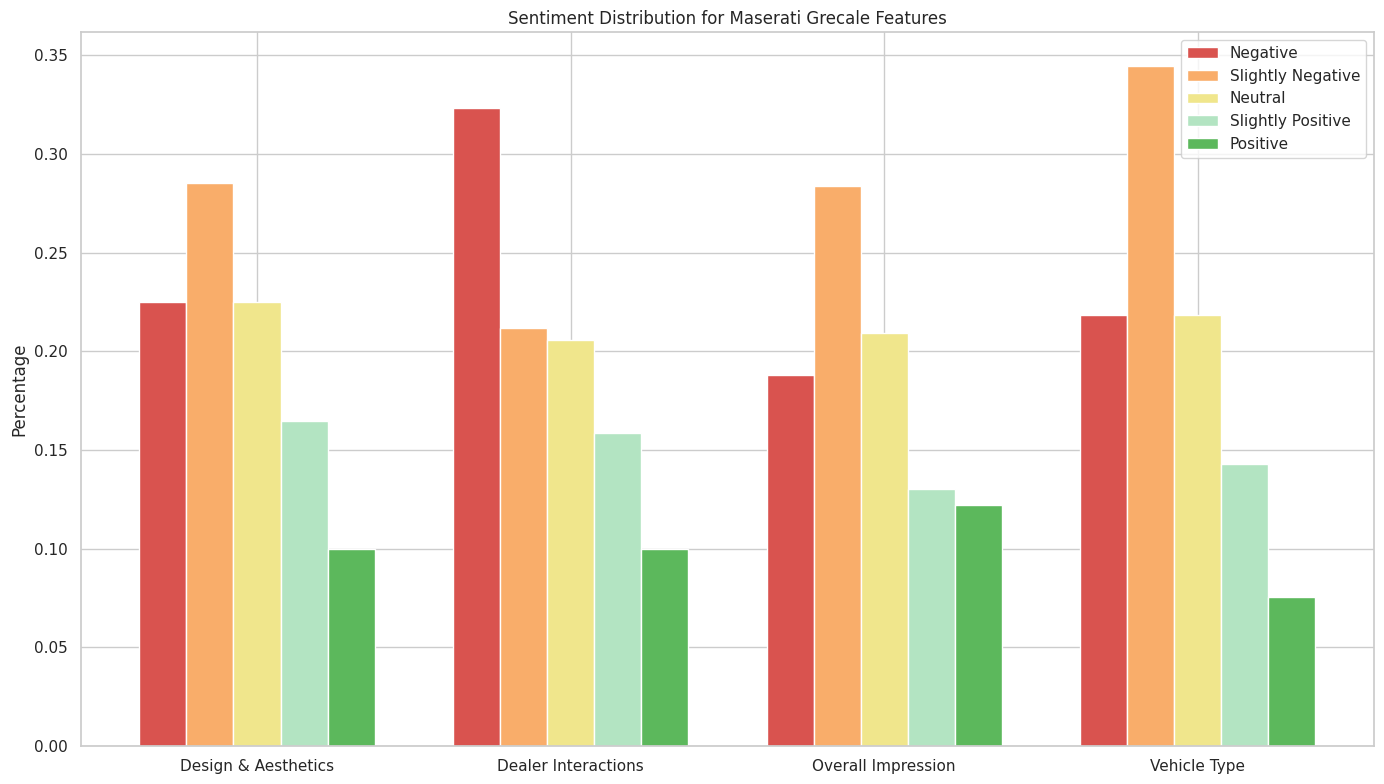

In [ ]:
# Manually inputting the grecale_data
grecale_data = {
    'Design & Aesthetics': {'Negative': 0.225, 'Slightly Negative': 0.2854, 'Neutral': 0.225, 'Slightly Positive': 0.1646, 'Positive': 0.1},
    'Dealer Interactions': {'Negative': 0.3235, 'Slightly Negative': 0.2118, 'Neutral': 0.2059, 'Slightly Positive': 0.1588, 'Positive': 0.1},
    'Overall Impression': {'Negative': 0.1879, 'Slightly Negative': 0.2837, 'Neutral': 0.2092, 'Slightly Positive': 0.1301, 'Positive': 0.1219},
    'Vehicle Type': {'Negative': 0.2185, 'Slightly Negative': 0.3445, 'Neutral': 0.2185, 'Slightly Positive': 0.1429, 'Positive': 0.0756}
}

# Recomputing data and plotting
labels = list(grecale_data.keys())
negative = [grecale_data[key]['Negative'] for key in labels]
slightly_negative = [grecale_data[key]['Slightly Negative'] for key in labels]
neutral = [grecale_data[key]['Neutral'] for key in labels]
slightly_positive = [grecale_data[key]['Slightly Positive'] for key in labels]
positive = [grecale_data[key]['Positive'] for key in labels]

x = np.arange(len(labels))
width = 0.15

# Plotting the grouped bar chart for Maserati Grecale
fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(x - 2*width, negative, width, label='Negative', color='#d9534f')
rects2 = ax.bar(x - width, slightly_negative, width, label='Slightly Negative', color='#f9ad6a')
rects3 = ax.bar(x, neutral, width, label='Neutral', color='#f0e68c')
rects4 = ax.bar(x + width, slightly_positive, width, label='Slightly Positive', color='#b3e4c2')
rects5 = ax.bar(x + 2*width, positive, width, label='Positive', color='#5cb85c')

ax.set_ylabel('Percentage')
ax.set_title('Sentiment Distribution for Maserati Grecale Features')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


In [ ]:
# Extracting a sample of negative comments for Maserati Grecale
negative_comments_grecale = df[(df['Model'] == 'Maserati Grecale') & (df['sentiment'] <= 1)]['Comment'].tolist()

negative_comments_grecale

['Terrible gloss black: CheckTerrible touchscreen to control climate: CheckCar interiors circa 2020s',
 'hahaha I thought it looked familiar they are almost identical',
 "LOL don't be shook by the prima donna would-be know-it-all b:tches around here who will absolutely complain about anything and everything.",
 "I knew it had a doppleganger!This thing seems so insanely redundant.... best of luck to Maserati, can't see who's gonna jump on this over the other dozen similar offerings but w/e",
 "So what, are they supposed to just stop making cars? Every new vehicle is a chance to improve their reputation. The launch of the new Grand Cherokee still has me weary of pre-Stellantis projects but I guess we'll see what happens. You'd think they'd put their A team on this car given Maserati is Stellantis' only global luxury brand.",
 'No physical HVAC controls, no care.',
 "I dont think anyone is looking to end the livelihoods of everyone dependent on Maserati's successBut theyve spent decades g

In [ ]:
# Extracting negative comments for Alfa Romeo Stelvio
negative_comments_stelvio = df[(df['Model'] == 'Alfa Romeo Stelvio') & (df['sentiment'] <= 1)]['Comment'].tolist()
negative_comments_stelvio

['The official launch is next Saturday but there are cars in (some, probably all) dealerships & orders have been open since 1st Aug.',
 "Ahh right, I'll cut Alfa a bit of slack for now then. But it wouldn't have hurt to give the press RHD versions for UK road testing I think. It's really not nice driving a LHD vehicle in the UK, and Alfa don't want to give journalists any excuse to get the car marked down.I've seen a couple of dealers post online this evening saying they now have their RHD cars in stock, and unlike with the Giulia it looks like Alfa has supplied more eye-catching white & Misano Blue models. Now all they need to do is a launch advert this week. Trouble is they don't have enough dealers to get too many people through the doors at once :idea:",
 "I thought I'd not seen Misano Blue on the configurator. Having checked, it's not on there, but one of the dealers has a RHD one in Misano. And there was a pretty nice dark green in the brochure but that's not on the configurator 

In [ ]:
negative_comments_Q5 = df[(df['Model'] == 'Audi Q5') & (df['sentiment'] <= 1)]['Comment'].tolist()
negative_comments_Q5

['Not rules, just some thoughts for your consideration. Please be nice to other forum members. Unfortunately every web forum attracts spammers and trolls. Try to avoid discussions with them and report it to admin. To post photos: please post your photo to one of the free web hosting sites, copy the URL, select the Image icon above your post text box, paste the URL and return. Please avoid posting large photo files as these take up bandwidth. Do you have any other useful tips for forum members?',
 'I knew it was too good to be true!',
 "The links to his images are to an external site. It is likely he turned them upside down himself in protest of being kicked (he's that kind of guy!).Sent fromAutoGuide.com Free App",
 'One thing I agree with Trump, we are rapidly becoming a third world country',
 'My dealer just told me to expect 6-8 weeks for delivery via Emden after the build week.',
 'I ordered mine on the 19th March and was given provisional week 16 build and estimated delivery 31st 

In [ ]:
negative_comments_X3 = df[(df['Model'] == 'BMW X3') & (df['sentiment'] <= 1)]['Comment'].tolist()
negative_comments_X3

[nan,
 'Sorry should read"pdf\'',
 'When will orders be acceptedI\'ve done the "build you own" on the BMW website and my local dealer has taken a deposit, but they are being cagey about when US orders actually open. Where did you hear "March" 2020 ? Anyone else actually have factory confirmation that their build is in production?',
 'all electric range EPA estimates?Hi Jon,What is the all electric range rated at? Thanks.',
 "Confused by HP rating of PHEVSo I'm confused by why the 2.0L Turbo 4 engine in the X3 non-hybrid is rated at 248HP, but when placed in the hybrid alongside an electric motor, the same (?) engine is rated at only 181HP. What am I missing (other than a basic understanding of HP & Torque)?Also, has a combined gas+electric range for the 30e been published or rumored?",
 "That’s our setup on my wife’s 2020 X3 M40i. I have a 07 Z4 3.0si with summer performance staggered tires and aftermarket struts/coils. As to performance, unless you’re going to track the car, you proba

In [ ]:
negative_comments_macan = df[(df['Model'] == 'Porsche Macan') & (df['sentiment'] <= 1)]['Comment'].tolist()
negative_comments_macan

['During a regular service at my local OPC (Tonbridge), I received a phone call saying everything was good, but the rear wiper needed replacing and could they do it for me.  Just before I said "yes", I asked "how much" and the answer was a staggering £68 - so I said "no" and picked up a Bosch one for just over ten quid.I am absolutely speechless - what do the rest of you think?',
 'Part of that £68 is £50 labour.',
 "Wow. That's ridiculous.",
 'After only 6 months? Are you one of those who we see on a sunny hot day with the rear wiper waving at us?',
 '1. It probably didn’t need replacing.2. Inclusive of hefty Porsche tax, to help to pay their army of staff and to recover the cost of their multi-million pound premises.  Not to mention coffee & pastries.',
 'or to cover the cost of financing unsold Taycans',
 'Consider yourselves lucky.Those of us with early Macan Gen 1 had a standard wiper that was dire, it squeaked and juddered badly, solution was to fit a replacement Bosch that we pa

MACAN

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
nltk.download('punkt')



# Load necessary resources
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# List of specific keywords to exclude
exclude_keywords_modified_negative = ["car", "maserati", "grecale", "alfa", "romeo", "stelvio", "audi", "q5", "bmw", "x3", "porsche", "macan"]

# Expand the stop words list
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stop_words_extended_negative = list(ENGLISH_STOP_WORDS) + exclude_keywords_modified_negative

# Preprocess the comments
def preprocess_comments(comments):
    processed_comments = []

    for comment in comments:
        # Tokenize and lower
        tokens = nltk.word_tokenize(comment.lower())

        # Remove stopwords and punctuation, and lemmatize
        tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words_extended_negative and token not in string.punctuation]

        processed_comments.append(' '.join(tokens))

    return processed_comments

# Assuming negative_comments_macan is your list of comments for the Porsche Macan

# Preprocess the negative comments for Porsche Macan
processed_comments_macan = preprocess_comments(negative_comments_macan)

# Vectorize the comments
vectorizer_macan = CountVectorizer(max_df=0.90, min_df=2, stop_words=stop_words_extended)
data_vectorized_macan = vectorizer_macan.fit_transform(processed_comments_macan)

# Apply LDA
lda_model_macan = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model_macan.fit(data_vectorized_macan)

# Extract topics and representative words for each topic
macan_topics = {}
for idx, topic in enumerate(lda_model_macan.components_):
    macan_topics[f"Topic {idx+1}"] = [vectorizer_macan.get_feature_names_out()[i] for i in topic.argsort()[-10:][::-1]]

macan_topics


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


AttributeError: ignored

X3

In [ ]:
# Preprocess the negative comments for Porsche Macan
processed_comments_X3 = preprocess_comments(negative_comments_X3)

# Vectorize the comments
vectorizer_X3 = CountVectorizer(max_df=0.90, min_df=2, stop_words=stop_words_extended)
data_vectorized_X3 = vectorizer_X3.fit_transform(processed_comments_X3)

# Apply LDA
lda_model_X3 = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model_X3.fit(data_vectorized_X3)

# Extract topics and representative words for each topic
X3_topics = {}
for idx, topic in enumerate(lda_model_X3.components_):
    X3_topics[f"Topic {idx+1}"] = [vectorizer_X3.get_feature_names_out()[i] for i in topic.argsort()[-10:][::-1]]

X3_topics

{'Topic 1': ['tire',
  'wheel',
  'using',
  'iphone',
  'just',
  'm40i',
  'steering',
  'like',
  'im',
  '19'],
 'Topic 2': ['just',
  'year',
  'seat',
  'like',
  'im',
  'dont',
  'new',
  'option',
  'm40i',
  'did'],
 'Topic 3': ['tire',
  'rear',
  'dealer',
  'mile',
  'like',
  'new',
  'just',
  'spare',
  'look',
  'year'],
 'Topic 4': ['just',
  'time',
  'button',
  'im',
  'turn',
  'know',
  'like',
  'vehicle',
  'drive',
  'carplay'],
 'Topic 5': ['dealer',
  'just',
  'like',
  'issue',
  'week',
  'new',
  'said',
  'dont',
  'time',
  'got']}

Q5

In [ ]:
# Preprocess the negative comments for Porsche Macan
processed_comments_Q5 = preprocess_comments(negative_comments_Q5)

# Vectorize the comments
vectorizer_Q5 = CountVectorizer(max_df=0.90, min_df=2, stop_words= stop_words_extended)
data_vectorized_Q5 = vectorizer_Q5.fit_transform(processed_comments_Q5)

# Apply LDA
lda_model_Q5 = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model_Q5.fit(data_vectorized_Q5)

# Extract topics and representative words for each topic
Q5_topics = {}
for idx, topic in enumerate(lda_model_Q5.components_):
    Q5_topics[f"Topic {idx+1}"] = [vectorizer_Q5.get_feature_names_out()[i] for i in topic.argsort()[-10:][::-1]]

Q5_topics

{'Topic 1': ['dealer',
  'week',
  'order',
  'build',
  'uk',
  'just',
  'new',
  'delivery',
  'told',
  'ordered'],
 'Topic 2': ['year',
  'new',
  'just',
  'mile',
  'sq5',
  'time',
  'model',
  'dont',
  'like',
  'engine'],
 'Topic 3': ['tyre',
  'mile',
  'just',
  'new',
  'ive',
  'winter',
  'im',
  'tread',
  'issue',
  '21'],
 'Topic 4': ['just',
  'wheel',
  'new',
  'dealer',
  'like',
  'year',
  'know',
  'insurance',
  'engine',
  'need'],
 'Topic 5': ['just',
  'using',
  'sq5',
  'iphone',
  'tapatalk',
  'price',
  'dont',
  'know',
  'new',
  'like']}

Stelvio

In [ ]:
# Preprocess the negative comments for Porsche Macan
processed_comments_stelvio = preprocess_comments(negative_comments_stelvio)

# Vectorize the comments
vectorizer_stelvio = CountVectorizer(max_df=0.90, min_df=2, stop_words= stop_words_extended)
data_vectorized_stelvio = vectorizer_stelvio.fit_transform(processed_comments_stelvio)

# Apply LDA
lda_model_stelvio = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model_stelvio.fit(data_vectorized_stelvio)

# Extract topics and representative words for each topic
stelvio_topics = {}
for idx, topic in enumerate(lda_model_stelvio.components_):
    stelvio_topics[f"Topic {idx+1}"] = [vectorizer_stelvio.get_feature_names_out()[i] for i in topic.argsort()[-10:][::-1]]

stelvio_topics

{'Topic 1': ['update',
  'just',
  'time',
  'ive',
  'map',
  'problem',
  'dont',
  'work',
  'warranty',
  'new'],
 'Topic 2': ['year',
  'dealer',
  'new',
  'got',
  'like',
  'battery',
  'week',
  'just',
  'giulia',
  'dont'],
 'Topic 3': ['just',
  'wheel',
  'using',
  'like',
  'dont',
  'tapatalk',
  'look',
  'dealer',
  'sound',
  'rear'],
 'Topic 4': ['said',
  'battery',
  'suv',
  'like',
  'just',
  'year',
  'better',
  'dont',
  'want',
  'time'],
 'Topic 5': ['just',
  'like',
  'think',
  'oil',
  'time',
  'engine',
  'look',
  'light',
  'dealer',
  'problem']}

Grecale

In [ ]:
# Preprocess the negative comments for Porsche Macan
processed_comments_grecale = preprocess_comments(negative_comments_grecale)

# Vectorize the comments
vectorizer_grecale = CountVectorizer(max_df=0.90, min_df=2, stop_words= stop_words_extended)
data_vectorized_grecale = vectorizer_grecale.fit_transform(processed_comments_grecale)

# Apply LDA
lda_model_grecale = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model_grecale.fit(data_vectorized_grecale)

# Extract topics and representative words for each topic
grecale_topics = {}
for idx, topic in enumerate(lda_model_grecale.components_):
    grecale_topics[f"Topic {idx+1}"] = [vectorizer_grecale.get_feature_names_out()[i] for i in topic.argsort()[-10:][::-1]]

grecale_topics

{'Topic 1': ['look',
  'like',
  'seat',
  'suv',
  'estate',
  'just',
  'new',
  '2024',
  'year',
  'dont'],
 'Topic 2': ['just',
  'phone',
  'work',
  'im',
  'charging',
  'did',
  'position',
  'driving',
  'day',
  'doesnt'],
 'Topic 3': ['door',
  'just',
  'issue',
  'like',
  'im',
  'dealer',
  'look',
  'vehicle',
  'month',
  'modena'],
 'Topic 4': ['dealer',
  'issue',
  'update',
  'like',
  'week',
  'just',
  'suv',
  'day',
  'key',
  'new'],
 'Topic 5': ['suv',
  'like',
  'just',
  'look',
  'vehicle',
  'looking',
  'im',
  'dont',
  'time',
  'day']}

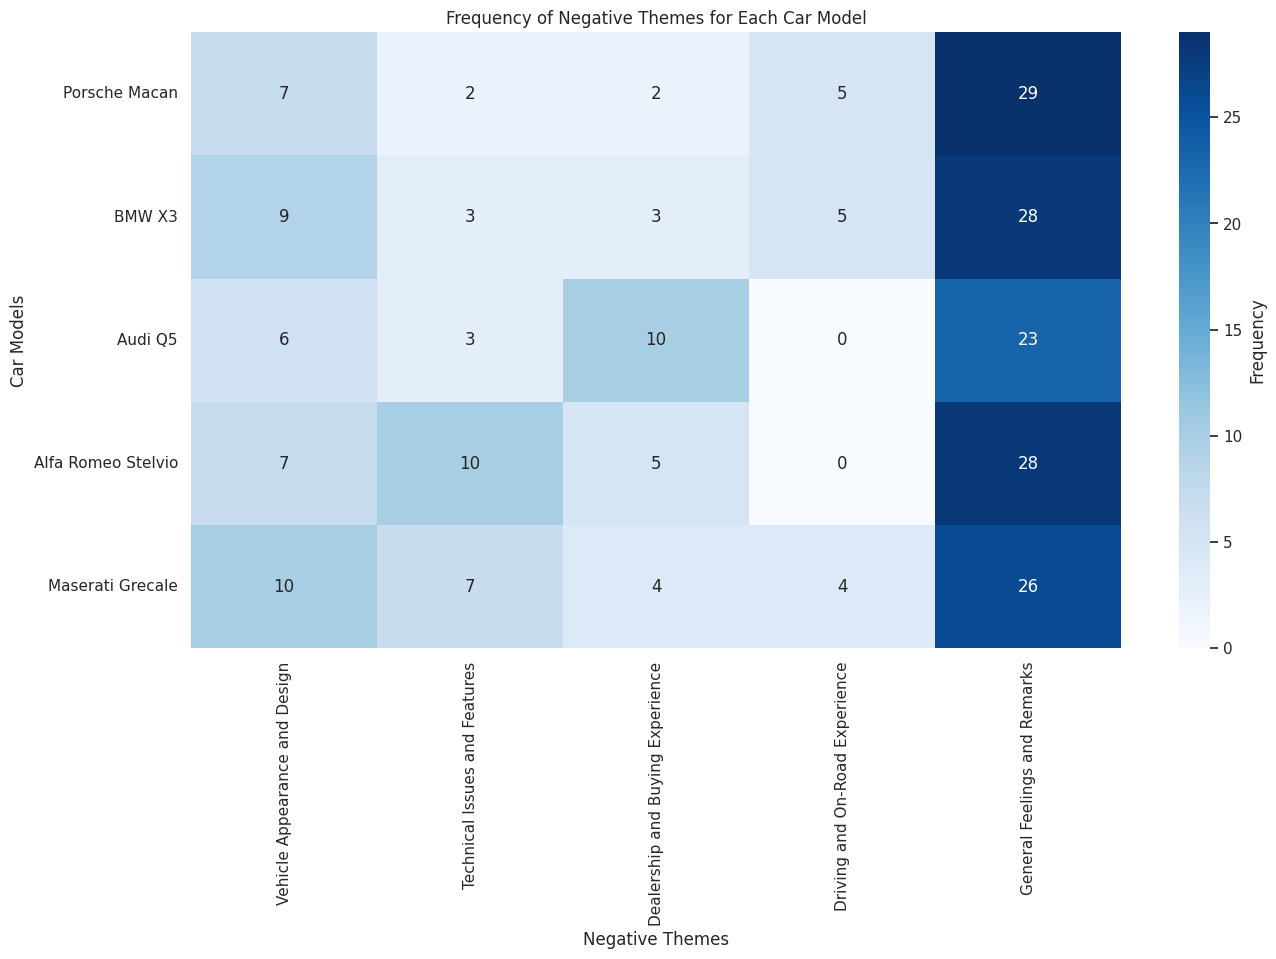

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the broader themes based on the topics' top words
themes = {
    'Vehicle Appearance and Design': ['look', 'design', 'seat', 'suv', 'estate', 'new', 'tire', 'wheel', 'rear'],
    'Technical Issues and Features': ['phone', 'work', 'charging', 'position', 'update', 'battery', 'issue', 'map', 'problem', 'engine', 'light', 'oil', 'carplay', 'button'],
    'Dealership and Buying Experience': ['dealer', 'week', 'order', 'build', 'uk', 'delivery', 'told', 'ordered', 'warranty', 'price', 'key'],
    'Driving and On-Road Experience': ['drive', 'sport', 'way', 'road', 'steering', 'driving', 'position', 'turn', 'drive', 'vehicle'],
    'General Feelings and Remarks': ['just', 'like', 'im', 'dont', 'think', 'know', 'want', 'time', 'day', 'said', 'did', 'year', 'month', 'new', 'got', 'ive', 'using', 'look']
}


# Define the topics for each model
models_topics = {
    'Porsche Macan': macan_topics,
    'BMW X3': X3_topics,
    'Audi Q5': Q5_topics,
    'Alfa Romeo Stelvio': stelvio_topics,
    'Maserati Grecale': grecale_topics
}

# Count the occurrence of each theme for every model
theme_counts = {theme: [] for theme in themes}

for model, topics in models_topics.items():
    for theme, keywords in themes.items():
        count = sum([word in topic for topic in topics.values() for word in keywords])
        theme_counts[theme].append(count)

# Convert to DataFrame for visualization
df_themes = pd.DataFrame(theme_counts, index=models_topics.keys())

# Plot
plt.figure(figsize=(15, 8))
sns.heatmap(df_themes, annot=True, cmap='Blues', cbar_kws={'label': 'Frequency'})
plt.title('Frequency of Negative Themes for Each Car Model')
plt.xlabel('Negative Themes')
plt.ylabel('Car Models')
plt.show()
